In [2]:

from sklearn.datasets import make_regression
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
from ipykernel import kernelapp as app

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df0 = pd.read_csv('C:/Users/a/GitHub/fc_team_project2/datasets/lcdf4.csv')
pd.options.display.max_rows=120
pd.options.display.max_columns=120

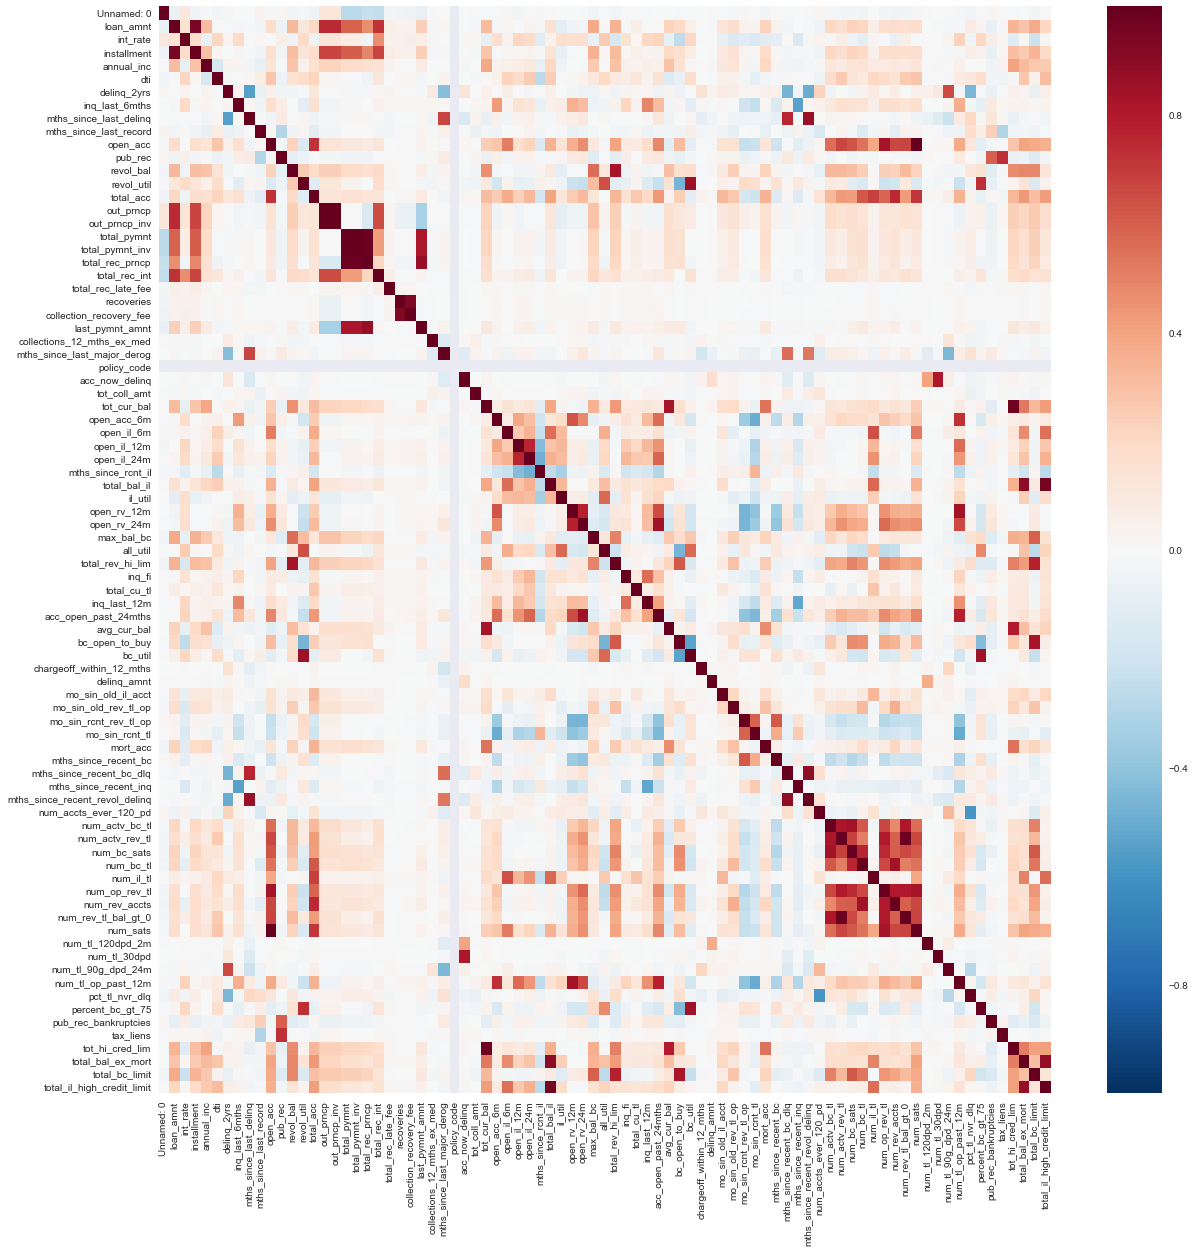

In [4]:
#서로 상관관계를 가지는 변수를 뺴주기 위해 고민하다 corr()을 히트맵화 시켜서 그림 그림.
plt.figure(figsize =(20,20))
sns.heatmap(df0.corr())
plt.show()

In [5]:
# 첫 과정에서 뺀것은 대출 이후 발생해서 int_rate에 영향을 주지 않은값들
df0.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med'], axis=1, inplace=True)

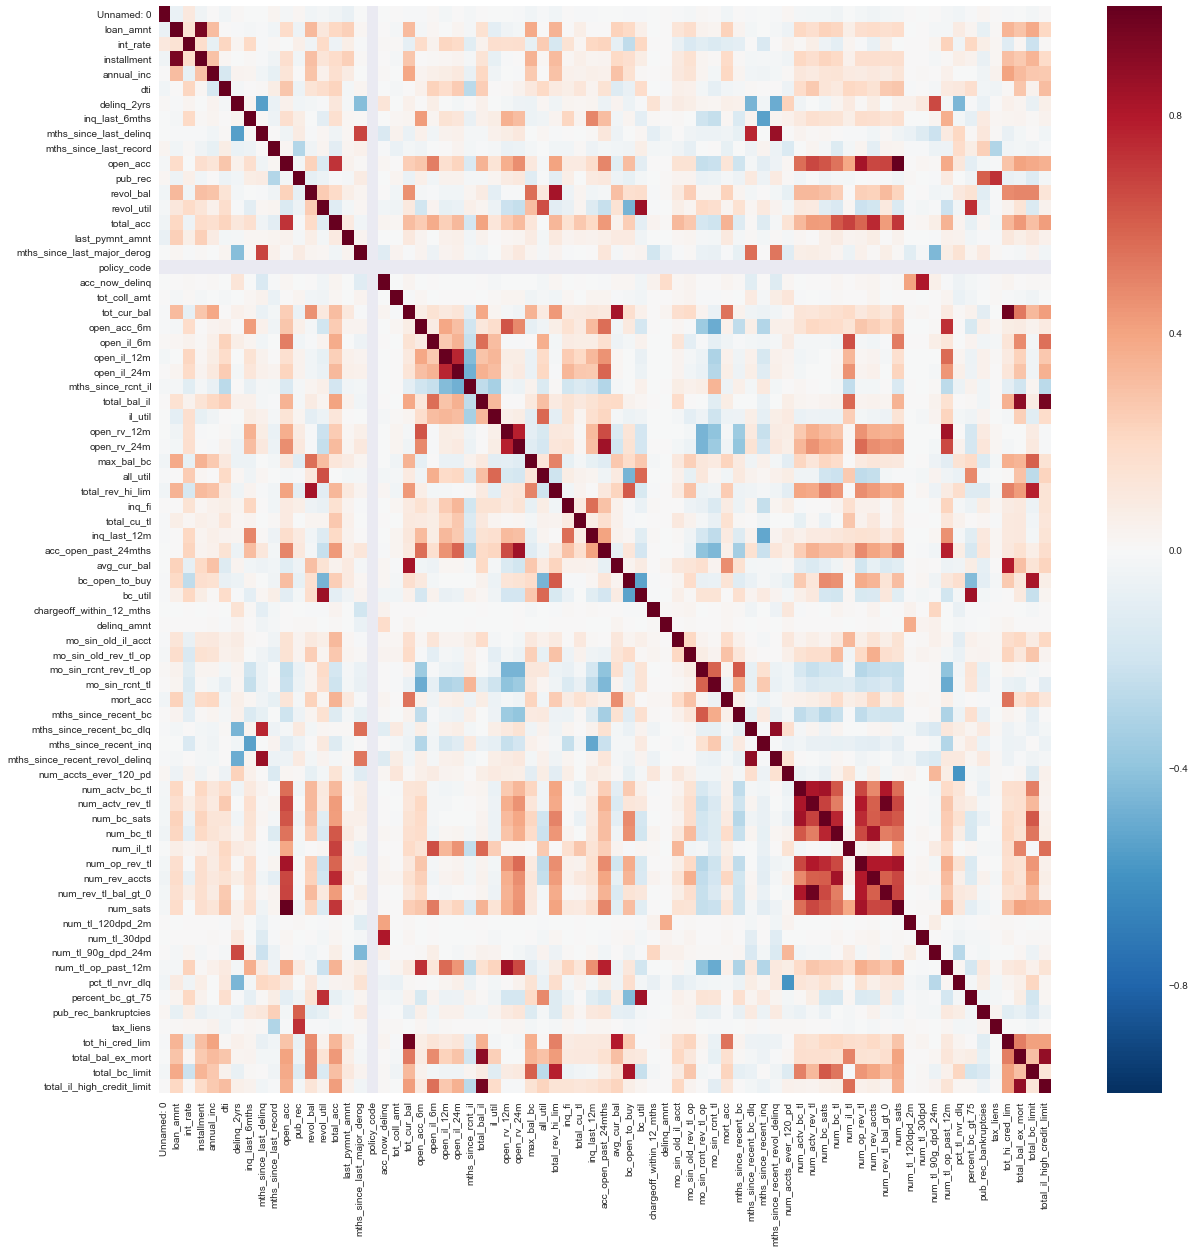

In [6]:
#칼럼 삭제후 코릴레이션 매트리스
plt.figure(figsize =(20,20))
sns.heatmap(df0.corr())
plt.show()

In [7]:
#두번째로 뺴는 값은 절대값 corr()>0.8 인 값들 
df0 = df0.drop(['loan_amnt', 'mths_since_last_delinq', 'open_acc', 'revol_util', 'revol_bal', 'acc_now_delinq', 'tot_cur_bal', 'total_bal_il', 'open_rv_12m' ,'open_rv_24m', 'bc_open_to_buy', 'bc_util', 'mths_since_recent_bc_dlq', 'num_actv_bc_tl', 'num_bc_tl', 'num_op_rev_tl', 'total_bal_ex_mort'], axis=1)

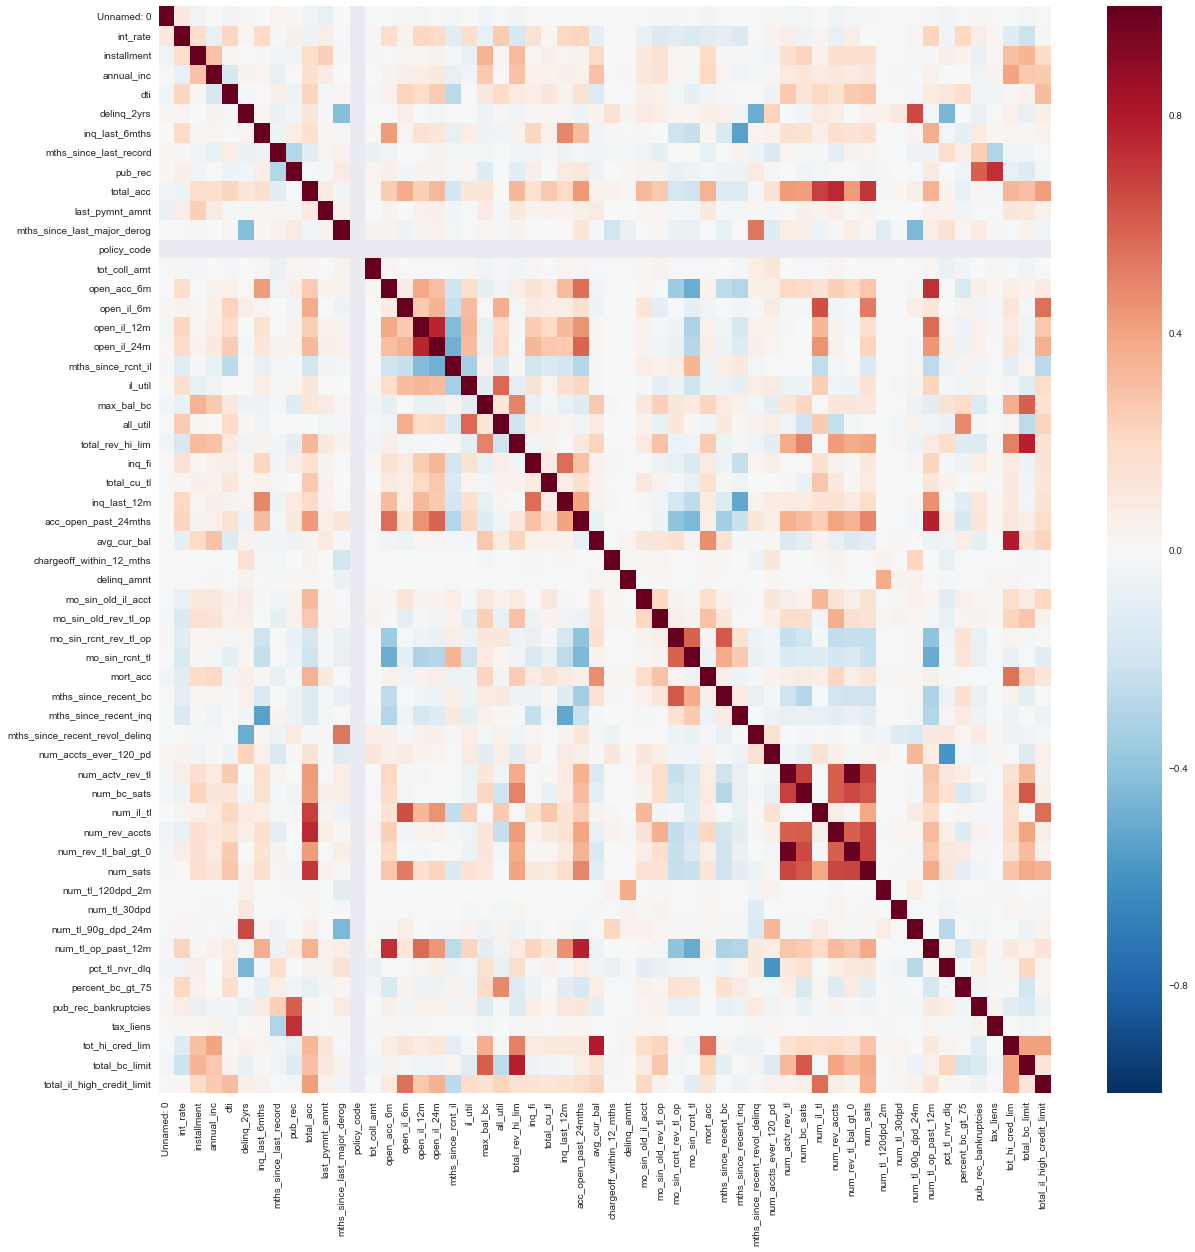

In [8]:
#두번째 칼럼삭제과정 이후의 코릴레이션 메트리스
plt.figure(figsize =(20,20))
sns.heatmap(df0.corr())
plt.show()

In [9]:
#값이 부동소수점인 칼럼만 받아오는 코드 
float_col = df0.dtypes[df0.dtypes == "float64"].index

In [10]:
# 부동소수점인 칼럼중 nan 값이 없는 column들만 남김.
float_col_real = [ u'installment', u'annual_inc', u'dti', u'inq_last_6mths',
       u'last_pymnt_amnt',
       u'tot_coll_amt', u'open_acc_6m',
       u'open_il_6m', u'open_il_12m', u'open_il_24m', u'mths_since_rcnt_il',
       u'max_bal_bc', u'all_util', u'total_rev_hi_lim', u'inq_fi',
       u'total_cu_tl', u'inq_last_12m', u'avg_cur_bal', u'mo_sin_old_il_acct',
       u'mo_sin_old_rev_tl_op',
       u'pct_tl_nvr_dlq',
       u'tot_hi_cred_lim', u'total_bc_limit', u'total_il_high_credit_limit']

In [11]:
# t값 낮고, w값이 확연히 다른 칼럼 삭제해서 cond_num 올림
float_col_real1 = [ u'installment', u'annual_inc', u'dti', u'inq_last_6mths',
       u'last_pymnt_amnt',
       u'tot_coll_amt', u'open_acc_6m',
       u'open_il_6m', u'open_il_12m', u'open_il_24m',
       u'max_bal_bc', u'all_util', u'total_rev_hi_lim', u'inq_fi',
       u'total_cu_tl', u'inq_last_12m', u'avg_cur_bal', u'mo_sin_old_il_acct',
       u'mo_sin_old_rev_tl_op',
       u'pct_tl_nvr_dlq',
       u'tot_hi_cred_lim', u'total_bc_limit', u'total_il_high_credit_limit']

In [12]:
# t 값이 낮은 녀석들을 없애서 R^2를 낮추지 않으며 Fstatics 올림. 
float_col_real2 = [ u'installment', u'dti', u'inq_last_6mths',
       u'last_pymnt_amnt',
       u'open_acc_6m',
       u'open_il_6m',
       u'all_util', u'total_rev_hi_lim',
       u'total_cu_tl', u'inq_last_12m', u'avg_cur_bal', u'mo_sin_old_il_acct',
       u'mo_sin_old_rev_tl_op',
       u'pct_tl_nvr_dlq',
       u'total_bc_limit', u'total_il_high_credit_limit']

In [13]:
#sm.OLS를 사용하기 위한 서로 다른 데이터 프레임 생성.및 오그멘테이션
dfx0 = df0[float_col_real]
dfx2 = df0[float_col_real2]
dfx1 = df0[float_col_real1]
dfx2["const"] = 1
dfx0["const"] = 1 
dfx1["const"] = 1

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [181]:
#dfx0 (가장 많은 feature가 있는 경우. )

model0 = sm.OLS(y,dfx0)
result0 = model0.fit()
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     7198.
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        02:40:59   Log-Likelihood:             1.6809e+05
No. Observations:              410907   AIC:                        -3.361e+05
Df Residuals:                  410882   BIC:                        -3.358e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
installment         

In [182]:
#dfx1 feature를 하난 줄였음에도 R^2는 거의 변하지 않고 컨디션 넘버 대폭감소

model1 = sm.OLS(y,dfx1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     7471.
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        02:41:00   Log-Likelihood:             1.6776e+05
No. Observations:              410907   AIC:                        -3.355e+05
Df Residuals:                  410883   BIC:                        -3.352e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
installment         

In [190]:
#dfx2 t 값이 낮은 feature를 제거험으로써 R^2를 거의 떨어트리지 않으면서 변수를 줄이고도 F-statistic값 올림.
model2 = sm.OLS(y,dfx2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               int_rate   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                 1.033e+04
Date:                Wed, 12 Jul 2017   Prob (F-statistic):               0.00
Time:                        02:43:03   Log-Likelihood:             1.6545e+05
No. Observations:              410907   AIC:                        -3.309e+05
Df Residuals:                  410890   BIC:                        -3.307e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
installment         

In [ ]:
"""
Y의 값을 제곱 세제곱 해가면서 비교해보기. 
"""

In [14]:
# "int_rate"와 다른 변수들간의 상관관계 ->> 그래프 그리기.(이 값이 높은애들과 살아남은 칼럼 비교 )
df_corr = df0.corr()
len(df_corr["int_rate"])

56

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in absolute
  if __name__ == '__main__':


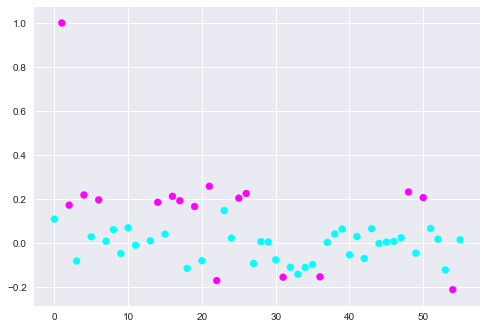

In [36]:
plt.scatter(range(56),df_corr["int_rate"],c=np.abs(df_corr["int_rate"])>0.15 ,cmap="cool")
plt.show()

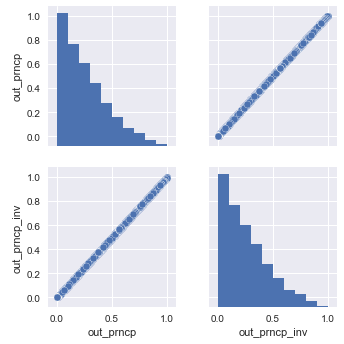

In [20]:

sns.pairplot(df0[["out_prncp","out_prncp_inv"]])
plt.show()

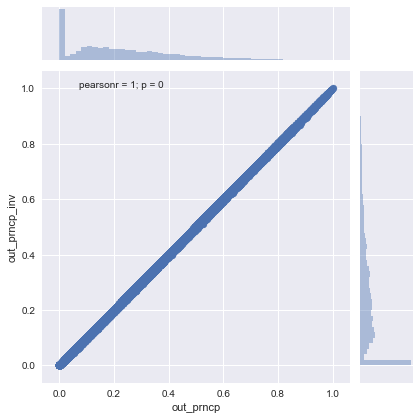

In [17]:
sns.jointplot(df0["out_prncp"],df0["out_prncp_inv"])
plt.show()